#### We'll begin by loading the CSV.
Normally I'd set it up to reload the data from online, however since this is for practice, using a static file is fine.

In [157]:
import pandas as pd

csv_path = "datasets/laptop_price - dataset.csv"
laptops = pd.read_csv(csv_path)
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


We see that the screen resolution has both text and resolution. It may be a good idea to pre-process the data so that it is a simpler comparison in terms of just display resolution. However, we can start with one hot encoding and see if that will cause any issues.

In [158]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

Numerical values that we'll be able to compare easily will be:
- screen size (Inches)
- cpu frequency
- ram
- weight (Probably not that relevant)
- price (what we want to predict)

 I wish there was more information in terms of things like year of production, number of cpu cores, and the like. I believe production year would have been one of the better attributes to use as a predictor.

Now, let's find out how many values there are for a few of the attributes.

In [159]:
laptops["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         263
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [160]:
laptops["CPU_Type"].value_counts()

CPU_Type
Core i5 7200U       193
Core i7 7700HQ      147
Core i7 7500U       133
Core i3 6006U        81
Core i7 8550U        73
                   ... 
Core M m3             1
E-Series E2-9000      1
Core M M3-6Y30        1
A6-Series 7310        1
A9-Series 9410        1
Name: count, Length: 93, dtype: int64

This one may cause issues, since there so many types of CPUs. we don't have to check all of these, but some of the data points may cause issues will be good to know.

In [161]:
laptops.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


We can see that no fields are missing data, which is good to know.

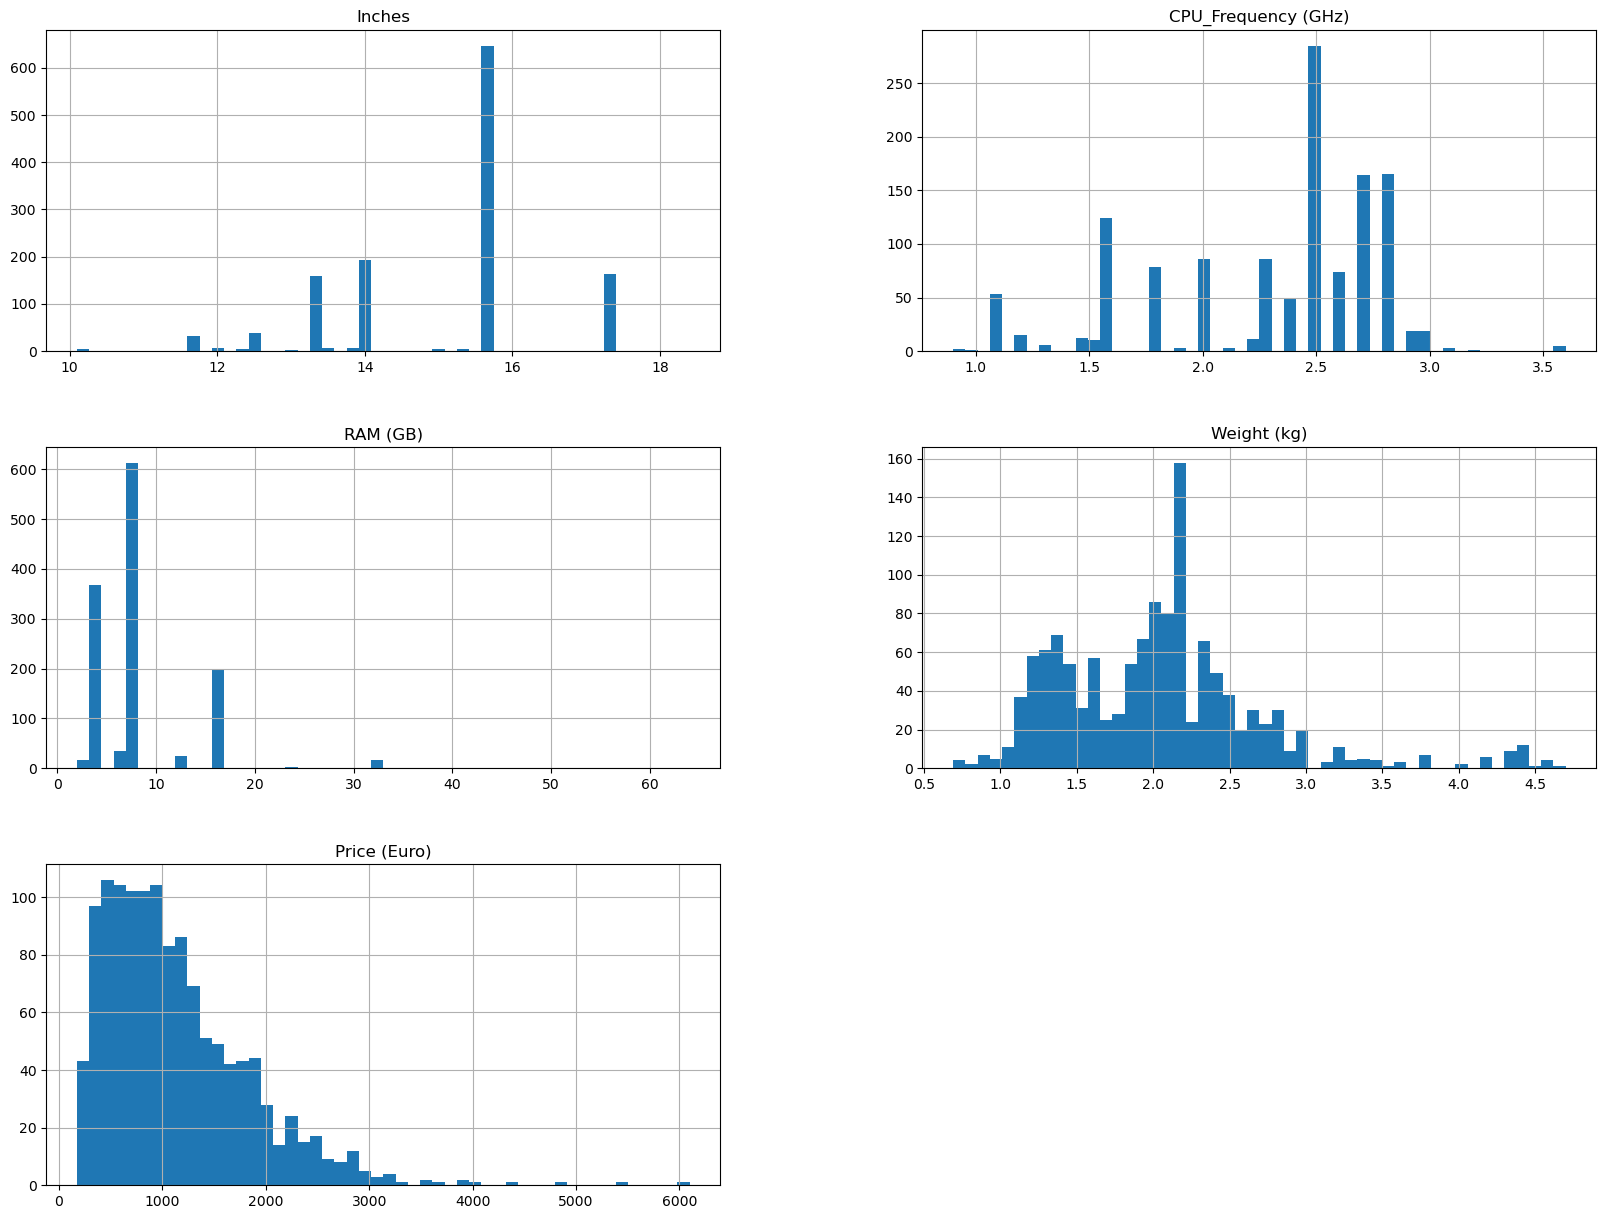

In [162]:
import matplotlib.pyplot as plt
laptops.hist(bins=50, figsize=(20,15))
plt.show()

Weight and price are tail-heavy, so we may need to alter our data so it does not over-fit the training sample.

Now, let's create our training and test sets.

In [163]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(laptops, test_size=0.2, random_state=42)

In [164]:
test_set.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
1179,HP,ProBook 450,Notebook,15.6,1366x768,Intel,Core i3 6100U,2.3,4,500GB HDD,Intel,HD Graphics 520,Windows 10,2.07,650.0
342,HP,ProBook 450,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel,Core i3 7100U,2.4,8,1TB HDD,Nvidia,GeForce 930MX,Windows 10,2.10,716.0
649,Lenovo,Thinkpad X270,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel,Core i7 7500U,2.7,8,256GB SSD,Intel,HD Graphics 620,Windows 10,1.36,1584.0
772,Toshiba,Tecra A40-C-1E5,Notebook,14.0,IPS Panel 1366x768,Intel,Core i5 6200U,2.3,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.75,1020.0
803,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel,Core i5 7300HQ,2.5,8,256GB SSD,Nvidia,GeForce GTX 1050,Windows 10,2.06,1749.0


Here, we could introduce stratified sampling, however there isn't a very good numerical value in this dataset. The date would be perfect, but unfortunately we do not have access to that. Attributes such as memory, gpu, and cpu would all be good choices, but again since they're not numerical it's difficult to easily split them.

Now, using the numerical attributes, let's see how much each attribute correlates with the laptop value. 

In [165]:
laptops_copy = train_set.copy()

In [166]:
corr_matrix = laptops_copy.corr(numeric_only=True)
corr_matrix["Price (Euro)"].sort_values(ascending = False)

Price (Euro)           1.000000
RAM (GB)               0.733379
CPU_Frequency (GHz)    0.422277
Weight (kg)            0.178861
Inches                 0.045676
Name: Price (Euro), dtype: float64

And as expected, all of these values show a positive correlation. The only one that may/may not be surprising is the weight, as a better computer usually means a more powerful one, causing the individual parts to weigh more.

array([[<Axes: xlabel='Price (Euro)', ylabel='Price (Euro)'>,
        <Axes: xlabel='RAM (GB)', ylabel='Price (Euro)'>,
        <Axes: xlabel='CPU_Frequency (GHz)', ylabel='Price (Euro)'>,
        <Axes: xlabel='Weight (kg)', ylabel='Price (Euro)'>,
        <Axes: xlabel='Inches', ylabel='Price (Euro)'>],
       [<Axes: xlabel='Price (Euro)', ylabel='RAM (GB)'>,
        <Axes: xlabel='RAM (GB)', ylabel='RAM (GB)'>,
        <Axes: xlabel='CPU_Frequency (GHz)', ylabel='RAM (GB)'>,
        <Axes: xlabel='Weight (kg)', ylabel='RAM (GB)'>,
        <Axes: xlabel='Inches', ylabel='RAM (GB)'>],
       [<Axes: xlabel='Price (Euro)', ylabel='CPU_Frequency (GHz)'>,
        <Axes: xlabel='RAM (GB)', ylabel='CPU_Frequency (GHz)'>,
        <Axes: xlabel='CPU_Frequency (GHz)', ylabel='CPU_Frequency (GHz)'>,
        <Axes: xlabel='Weight (kg)', ylabel='CPU_Frequency (GHz)'>,
        <Axes: xlabel='Inches', ylabel='CPU_Frequency (GHz)'>],
       [<Axes: xlabel='Price (Euro)', ylabel='Weight (kg)'>,
   

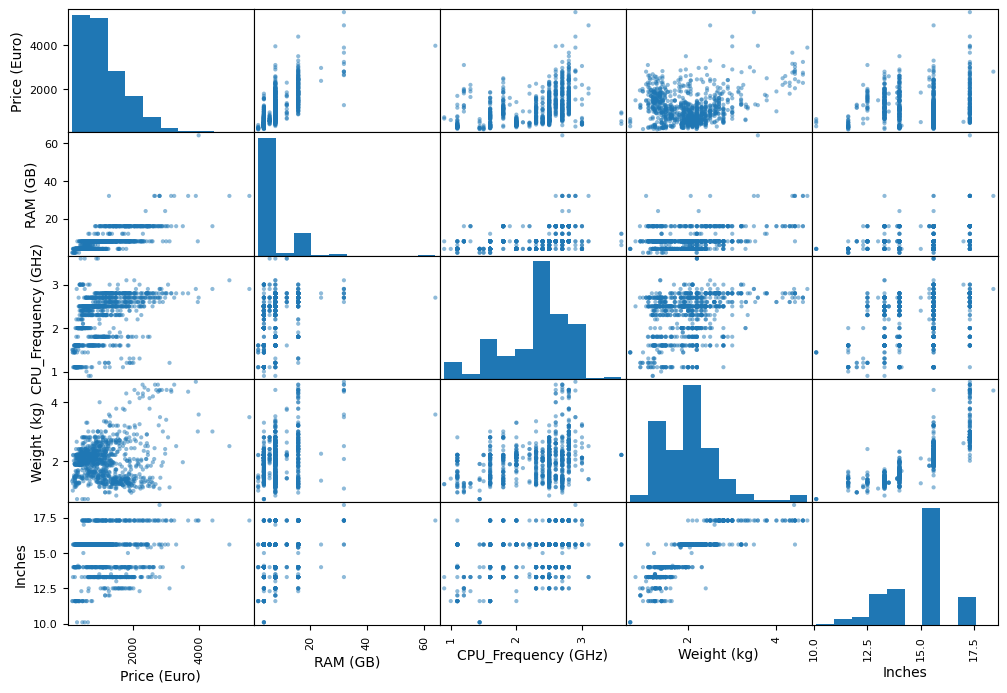

In [167]:
from pandas.plotting import scatter_matrix
attributes = ["Price (Euro)", "RAM (GB)", "CPU_Frequency (GHz)", "Weight (kg)", "Inches"]
scatter_matrix(laptops_copy[attributes], figsize=(12, 8))

The best predictors seem to be the amount of ram and the CPU frequency, so we can examine those more closely

<Axes: xlabel='CPU_Frequency (GHz)', ylabel='Price (Euro)'>

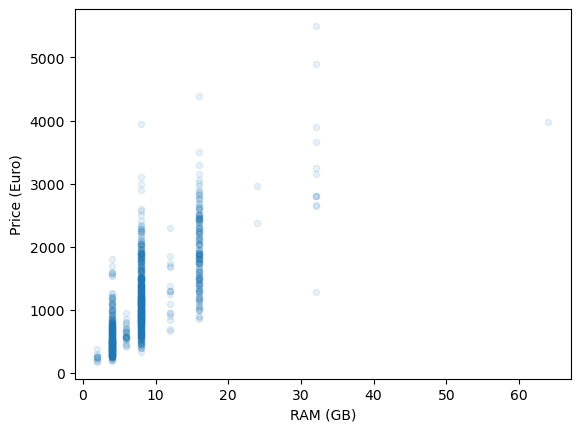

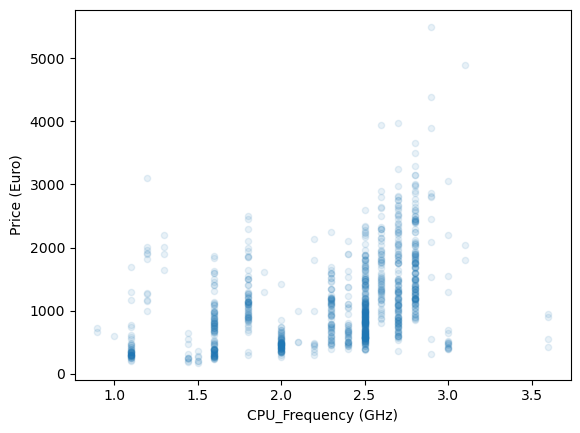

In [168]:
laptops_copy.plot(kind="scatter", x="RAM (GB)", y="Price (Euro)",
             alpha=0.1)
laptops_copy.plot(kind="scatter", x="CPU_Frequency (GHz)", y="Price (Euro)",
             alpha=0.1)

In [169]:
laptops_copy = train_set.drop("Price (Euro)", axis=1)
laptops_labels = train_set["Price (Euro)"].copy()

#### Text attributes
Now, we also want to use the text fields. However, since there are a lot of possible options, it may be difficult. We will attempt it with the oneHot encoder and see what results we achieve.

In [170]:
non_num_attributes = ["Company", "Product", "TypeName", "ScreenResolution", "CPU_Company", "CPU_Type", "Memory", "GPU_Company", "GPU_Type", "OpSys"]
laptop_non_num = []
for cat in non_num_attributes:
    laptop_non_num.append(laptops_copy[cat])

laptop_non_num

[413       Acer
 778      Razer
 1107    Lenovo
 96        Dell
 309         HP
          ...  
 1044        HP
 1095      Acer
 1130        HP
 860     Lenovo
 1126    Lenovo
 Name: Company, Length: 1020, dtype: object,
 413                             Aspire R7
 778                             Blade Pro
 1107                       Yoga 500-15ISK
 96                          Inspiron 3567
 309                                250 G6
                       ...                
 1044                        EliteBook 840
 1095                       Aspire F5-573G
 1130    15-bs078cl (i7-7500U/8GB/2TB/W10)
 860                         ThinkPad E570
 1126                            Yoga Book
 Name: Product, Length: 1020, dtype: object,
 413     2 in 1 Convertible
 778                 Gaming
 1107    2 in 1 Convertible
 96                Notebook
 309               Notebook
                ...        
 1044              Notebook
 1095              Notebook
 1130              Notebook
 860     

Because we are using a large number of possible categories, we may want to use embeddings instead. however, due to current limitations of what we know, we will keep it like so.

In [171]:
#TODO: please revise this section, the laptop_1hot array may be incorrect.
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
laptop_1hot = [[]]
laptop_1hot = cat_encoder.fit_transform(laptop_non_num)
laptop_1hot.toarray()

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Feature Scaling
Now, we want to be able to standardize the values so that outliers will not vastly affect the predictions.

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

laptops_num = laptops_copy.copy()
for attribute in non_num_attributes:
    laptops_num = laptops_num.drop(attribute, axis=1)
    

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

laptop_num_tr = num_pipeline.fit_transform(laptops_num)

In [173]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [174]:
num_attribs = list(laptops_num)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), non_num_attributes),
    ])

laptops_prepared = full_pipeline.fit_transform(laptops_copy)

##### Linear Regression

In [175]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(laptops_prepared, laptops_labels)

LinearRegression()

In [176]:
# let's try the full preprocessing pipeline on a few training instances
some_data = laptops_copy.iloc[:5]
some_labels = laptops_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 872.73738394 2936.29208343  756.84027457  669.94720134  418.5107247 ]


In [177]:
print("Labels: ", list(some_labels))

Labels:  [789.01, 2899.0, 867.0, 599.9, 469.0]


Now, to calculate the mean squared error:

In [178]:
from sklearn.metrics import mean_squared_error
import numpy as np

laptop_predictions = lin_reg.predict(laptops_prepared)
lin_mse = mean_squared_error(laptops_labels, laptop_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

86.2303358161455

Not a bad result, off by about 86 euros. Let's see if we can improve this.

In [179]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(laptops_prepared, laptops_labels)

DecisionTreeRegressor(random_state=42)

In [180]:
laptops_predictions = tree_reg.predict(laptops_prepared)
tree_mse = mean_squared_error(laptops_labels, laptops_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

13.05613580868788

#### Cross-Validation

In [181]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, laptops_prepared, laptops_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [182]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [325.05471854 353.4604956  325.70142836 436.35569008 226.70922364
 487.24599828 451.07597174 368.71633414 353.8958353  415.82324947]
Mean: 374.4038945159048
Standard deviation: 71.88746603266613


standard deviation of 71.89 is a bit better, but I feel like we can improve this.

In [183]:
lin_scores = cross_val_score(lin_reg, laptops_prepared, laptops_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [422.67850216 385.84912667 380.8082346  315.35624985 411.04947674
 354.0099398  430.36972403 522.34130116 399.22163789 306.16757144]
Mean: 392.7851764349428
Standard deviation: 58.87183907636229


#### Random Forest Regressor

In [184]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(laptops_prepared, laptops_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [185]:
laptops_predictions = forest_reg.predict(laptops_prepared)
forest_mse = mean_squared_error(laptops_labels, laptops_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

133.1423914643246

somewhat surprisingly, it seems as though the random forests is not performing well. We will now move on to the next step:

#### Fine-tuning the model

In [186]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'fit_intercept': [True, False], 'n_jobs': [None, 1, 2, 4, 6, 8, 10, 12]}
  ]

# train across 5 folds 
grid_search = GridSearchCV(lin_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(laptops_prepared, laptops_labels)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'n_jobs': [None, 1, 2, 4, 6, 8, 10, 12]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [187]:
grid_search.best_params_

{'fit_intercept': True, 'n_jobs': None}

So from this fine-tuning, we see that there isn't much improvement to see from the modifying the values, as None = 1 in our case.

In [188]:
# Access the coefficients of the best estimator
best_model = grid_search.best_estimator_

# Coefficients of the linear model
coefficients = best_model.coef_
print(attributes)

# You can pair them with feature names if you have them
sorted(zip(coefficients, attributes + non_num_attributes), reverse=True)  # feature_names is your list of features

# for feature, importance in feature_importances:
#     print(f"{feature}: {importance}")


['Price (Euro)', 'RAM (GB)', 'CPU_Frequency (GHz)', 'Weight (kg)', 'Inches']


[(597.0868117031292, 'GPU_Type'),
 (219.60938947548345, 'CPU_Type'),
 (149.09829651451543, 'Company'),
 (147.44275523277543, 'Weight (kg)'),
 (63.67112239392723, 'CPU_Frequency (GHz)'),
 (49.64728189190562, 'GPU_Company'),
 (24.904063633444075, 'RAM (GB)'),
 (-17.07534798162931, 'Price (Euro)'),
 (-87.63573784879205, 'Memory'),
 (-100.53335424670739, 'OpSys'),
 (-185.55646430150608, 'ScreenResolution'),
 (-211.07353665047034, 'Product'),
 (-264.96474586055876, 'TypeName'),
 (-286.00878976519397, 'CPU_Company'),
 (-375.7984654508818, 'Inches')]

So, based on what we can tell, the best indicators of laptop price are:
- Operating system
- Memory
- The product itself
- Screen size

In a similar fashion, I believe weight should not be there, as it currently has a positive correlation. A heavy laptop does not mean a good laptop, so I will be dropping the attribute.

This means that if we want to re-train our data, we could omit everything else, and maybe see an improvement with our model.

In [189]:
values_to_drop = ['RAM (GB)', 'GPU_Company', 'CPU_Company', 'TypeName', 'ScreenResolution', 'CPU_Type', 'Company', 'Weight (kg)']
laptops_copy = train_set.drop(values_to_drop + ["Price (Euro)"], axis=1)
laptops_labels = train_set.drop(values_to_drop, axis=1)["Price (Euro)"].copy()
print(laptops_num.columns)

Index(['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)'], dtype='object')


In [199]:
non_num_attributes = ['OpSys', 'Memory', 'Product']
num_attribs = ['Inches']

final_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), non_num_attributes),
    ])

laptops_prepared = final_pipeline.fit_transform(laptops_copy)


lin_scores = cross_val_score(lin_reg, laptops_prepared, laptops_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [444.86567129 388.45939458 450.80775409 459.78790477 440.65624907
 379.12957734 403.94157127 533.44009049 425.68112062 363.74076   ]
Mean: 429.0510093512083
Standard deviation: 46.63375958204469


And here we see an improvement! The standard deviation went down to 53.9. Now, using our new fine-tuned model, we can proceed to evaluate the system.
## Final evaluation

In [202]:
# Perform grid search with the prepared training data
grid_search.fit(laptops_prepared, laptops_labels)
final_model = grid_search.best_estimator_

X_test = test_set.drop(values_to_drop + ["Price (Euro)"], axis=1)
y_test = test_set["Price (Euro)"].copy()

# Transform the test set using the fitted pipeline (without fitting again)
X_test_prepared = final_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

# Evaluate the performance (calculate the RMSE)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


383.1103440744482

In [197]:
grid_search.fit(laptops_prepared, laptops_labels)
final_model = grid_search.best_estimator_

X_test = test_set.drop(values_to_drop + ["Price (Euro)"], axis=1)
y_test = test_set["Price (Euro)"].copy()

X_test_prepared = final_pipeline.fit_transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

ValueError: X has 221 features, but LinearRegression is expecting 569 features as input.